# Import

### lib

In [30]:
import sys
import os

import pandas as pd
import numpy as np
import missingno as msno

In [19]:
sys.path.append("../../")


# from ... import ...

### env & settings

In [20]:
DATA_DIR = "/workspace/Storage/kaggle/Data/insurance"
PATH_TRAIN = os.path.join(DATA_DIR, "raw", "train.csv")
PATH_TEST = os.path.join(DATA_DIR, "raw", "test.csv")

### Data

In [21]:
train = pd.read_csv(PATH_TRAIN)
test = pd.read_csv(PATH_TEST)

# Analysis

## overview

### offered description

Dataset Description

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Insurance Premium Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Files

- train.csv - the training dataset; Premium Amount is the continuous target
- test.csv - the test dataset; your objective is to predict target Premium Amount for each row
- sample_submission.csv - a sample submission file in the correct format

Insurance Premium Prediction Dataset

Problem Statement

The goal of this dataset is to facilitate the development and testing of regression models for predicting insurance premiums based on various customer characteristics and policy details. Insurance companies often rely on data-driven approaches to estimate premiums, taking into account factors such as age, income, health status, and claim history. This synthetic dataset simulates real-world scenarios to help practitioners practice feature engineering, data cleaning, and model training.

Dataset Overview

This dataset contains 2Lk+ and 20 features with a mix of categorical, numerical, and text data. It includes missing values, incorrect data types, and skewed distributions to mimic the complexities faced in real-world datasets. The target variable for prediction is the "Premium Amount".

Features

- Age: Age of the insured individual (Numerical)
- Gender: Gender of the insured individual (Categorical: Male, Female)
- Annual Income: Annual income of the insured individual (Numerical, skewed)
- Marital Status: Marital status of the insured individual (Categorical: Single, Married, Divorced)
- Number of Dependents: Number of dependents (Numerical, with missing values)
- Education Level: Highest education level attained (Categorical: High School, Bachelor's, Master's, PhD)
- Occupation: Occupation of the insured individual (Categorical: Employed, Self-Employed, Unemployed)
- Health Score: A score representing the health status (Numerical, skewed)
- Location: Type of location (Categorical: Urban, Suburban, Rural)
- Policy Type: Type of insurance policy (Categorical: Basic, Comprehensive, Premium)
- Previous Claims: Number of previous claims made (Numerical, with outliers)
- Vehicle Age: Age of the vehicle insured (Numerical)
- Credit Score: Credit score of the insured individual (Numerical, with missing values)
- Insurance Duration: Duration of the insurance policy (Numerical, in years)
- Premium Amount: Target variable representing the insurance premium amount (Numerical, skewed)
- Policy Start Date: Start date of the insurance policy (Text, improperly formatted)
- Customer Feedback: Short feedback comments from customers (Text)
- Smoking Status: Smoking status of the insured individual (Categorical: Yes, No)
- Exercise Frequency: Frequency of exercise (Categorical: Daily, Weekly, Monthly, Rarely)
- Property Type: Type of property owned (Categorical: House, Apartment, Condo)

Data Characteristics
- Missing Values: Certain features contain missing values to simulate real-world data collection issues.
- Incorrect Data Types: Some fields are intentionally set to incorrect data types to practice data cleaning.
- Skewed Distributions: Numerical features like Annual Income and Premium Amount have skewed distributions, which can be addressed through transformations.

Usage

This dataset can be used for:
- Practicing feature engineering techniques.
- Implementing data cleaning and preprocessing steps.
- Training regression models for predicting insurance premiums.
- Evaluating model performance and tuning hyperparameters.

License

This synthetic dataset is created for educational purposes and can be used freely for practice and experimentation.

### train

In [22]:
train.shape

(1200000, 21)

In [23]:
train.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [24]:
train.head(5)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


<Axes: >

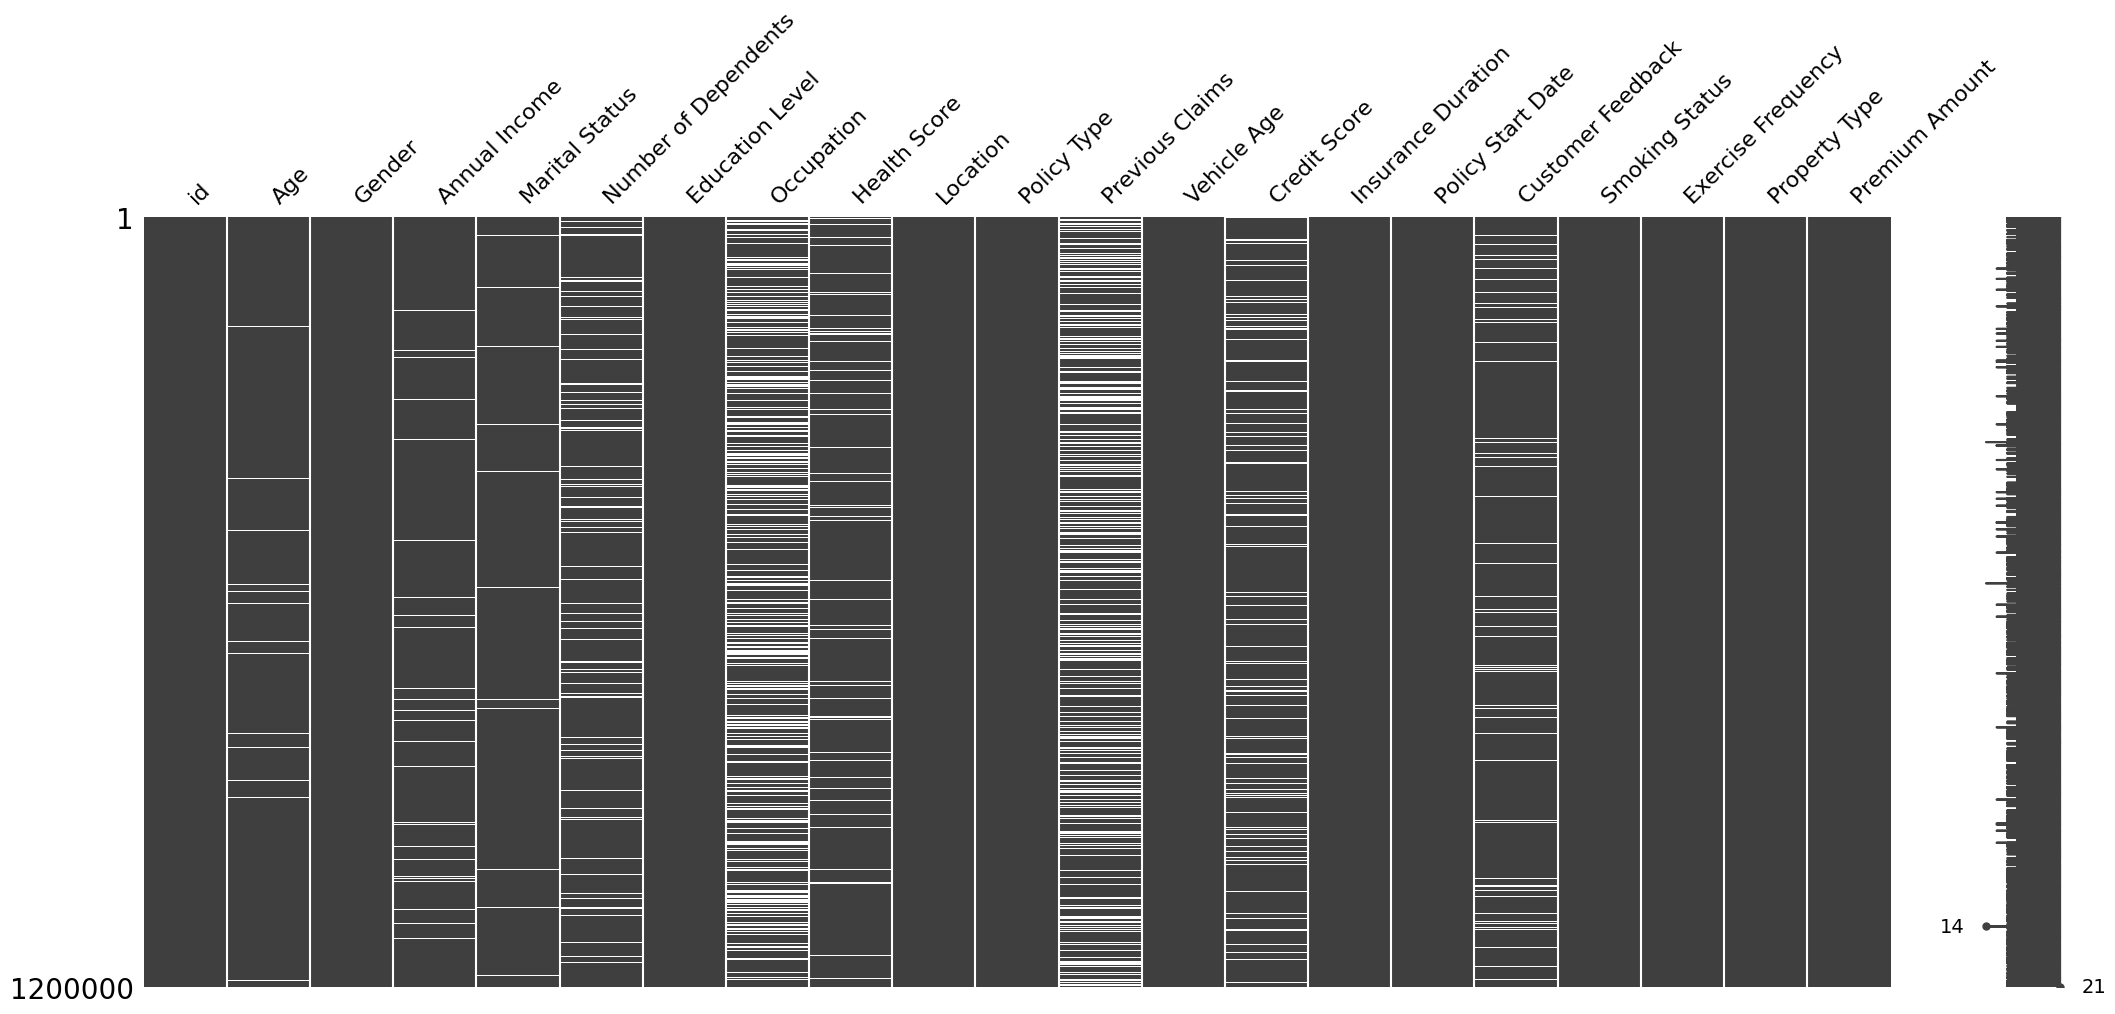

In [31]:
msno.matrix(train)

### test

In [25]:
test.shape

(800000, 20)

In [26]:
test.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type'],
      dtype='object')

In [27]:
test.head(5)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


<Axes: >

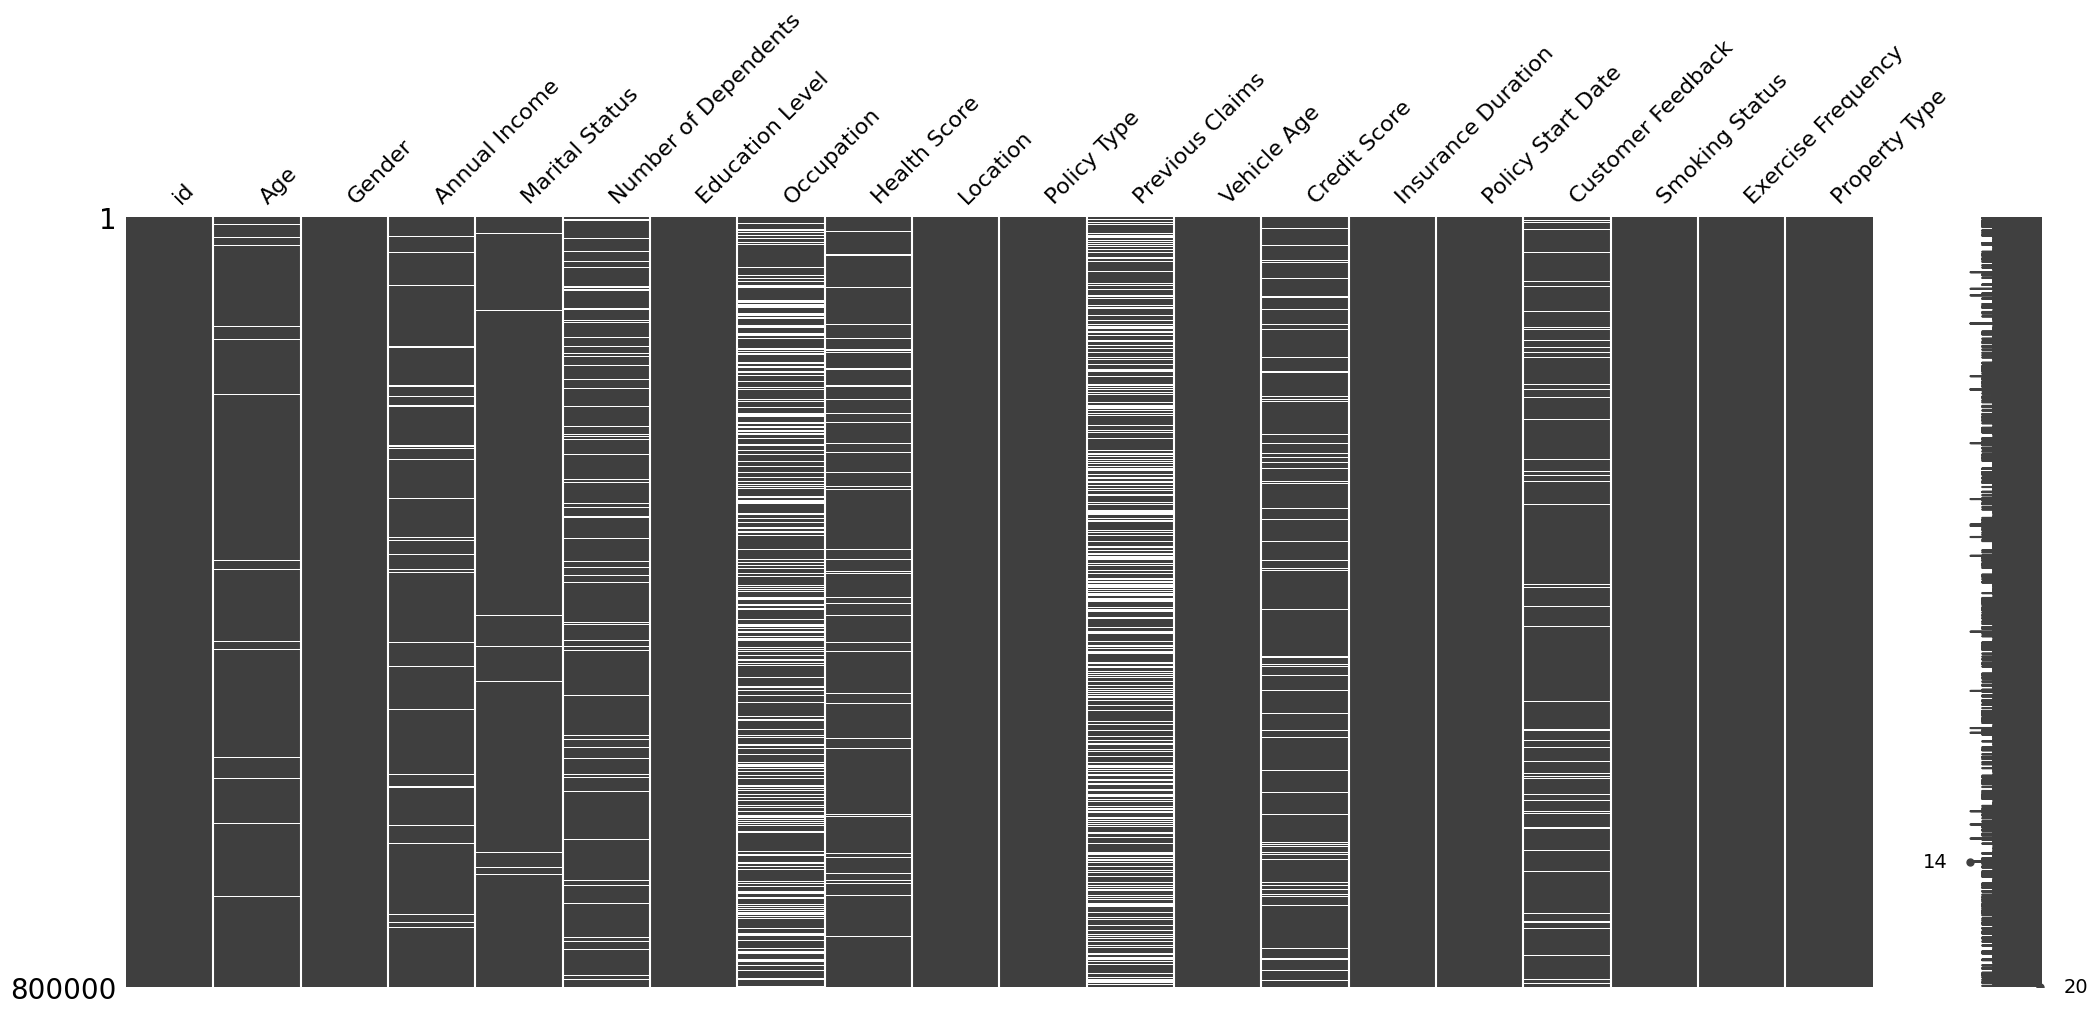

In [32]:
msno.matrix(test)

### opinion
- 원본 데이터가 존재하며 제공된 데이터는 원본으로부터 AI로 생성된 데이터
- 시계열성 보이지 않음
- Premium Amount가 타겟

## Univariate Analysis

### Targets

#### Premium Amount

##### DQA, cleaning

In [29]:
train['Premium Amount']

0          2869.0
1          1483.0
2           567.0
3           765.0
4          2022.0
            ...  
1199995    1303.0
1199996     821.0
1199997     371.0
1199998     596.0
1199999    2480.0
Name: Premium Amount, Length: 1200000, dtype: float64

##### distribution

##### missing values

### Features

#### id

#### Age


#### Gender


#### Annual Income


#### Marital Status


#### Number of Dependents


#### Education Level


#### Occupation


#### Health Score


#### Location


#### Policy Type


#### Previous Claims


#### Vehicle Age


#### Credit Score


#### Insurance Duration

#### Policy Start Date

#### Customer Feedback

#### Smoking Status

#### Exercise Frequency

#### Property Type

#### Premium Amount

## Multivariate Analysis

### correlation

# Conclusion

# Plan